![](https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/cover.png?raw=true)

<div class="alert alert-block alert-warning">
<center><b>【第四阶段】项目日志</b></center>
    
    
第四阶段：【数据分析全解析】
   
第四节阶段核心目的：全方位解析你所不知道的数据分析全链路，第三阶段数据分析部分结束。
    
难度（最高5星）：⭐⭐⭐
    


Good Luck!
</div>

# 数据挖掘

什么是数据挖掘？

> 数据挖掘（英语：data mining）是一个跨学科的计算机科学分支。它是用人工智能、机器学习、统计学和数据库的交叉方法在相对较大型的数据集中发现模式的计算过程。数据挖掘过程的总体目标是从一个数据集中提取信息，并将其转换成可理解的结构，以进一步使用。

那么，数据分析和数据挖掘有什么区别么？

1. “数据分析”的重点是观察数据，而“数据挖掘”的重点是从数据中发现“知识规则”KDD（Knowledge Discover in Database）。

2. “数据分析”得出的结论是人的智力活动结果，而“数据挖掘”得出的结论是机器从学习集（或训练集、样本集）发现的知识规则。

3. “数据分析”得出结论的运用是人的智力活动，而“数据挖掘”发现的知识规则，可以直接应用到预测。

4. ”数据分析”不能建立数学模型，需要人工建模，而“数据挖掘”直接完成了数学建模。如传统的控制论建模的本质就是描述输入变量与输出变量之间的函数关系，“数据挖掘”可以通过机器学习自动建立输入与输出的函数关系，根据KDD得出的“规则”，给定一组输入参数，就可以得出一组输出量。

数据分析(狭义)和数据挖掘的本质是一样的，就是从数据中找到业务知识(有价值的信息)，从而帮助业务运营，改进产品，帮助企业做出更好的决策。因此，数据分析(狭义)和数据挖掘构成了广义的数据分析。

那么，今天为大家带来的内容是，如何借助元数据（meta data）来去进行数据分析、数据挖掘。



探索式分析EDA
- [离散特征分析](#离散特征分析)
    - [Nominal](#Nominal)
    - [Binary](#Binary)
    - [Ordinal](#Ordinal)
- [连续特征分析](#连续特征分析)
    - [相关性分析](#相关性分析)
    - [回归分析](#回归分析)
- [互信息分析](#互信息分析)
- [特征重要度分析](#特征重要度分析)
        

In [1]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

from sklearn.feature_selection import mutual_info_classif

%matplotlib inline

In [2]:
# 读取数据

train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")

In [3]:
# 全集
fullset = pd.concat([train,test],ignore_index=True)

In [4]:
train_imp = pd.read_csv("train_imp.csv",index_col=0)

## 离散特征分析

让我们看一下各个离散特征对于target=1的贡献程度。

你可能很好奇该如何量化贡献程度呢？其实我的意思就是查看离散变量里面的每个class之中target=1的占比。我们可以用`groupby+mean`实现。

In [5]:
from data_management import meta # 把meta那个函数放到data_management.py里面

In [6]:
metadata = meta(train,test)

In [7]:
# metadata

### Nominal

先来看看Nominal的吧！

In [8]:
cat_cols = metadata[(metadata.level == 'nominal') & (metadata.keep)].index

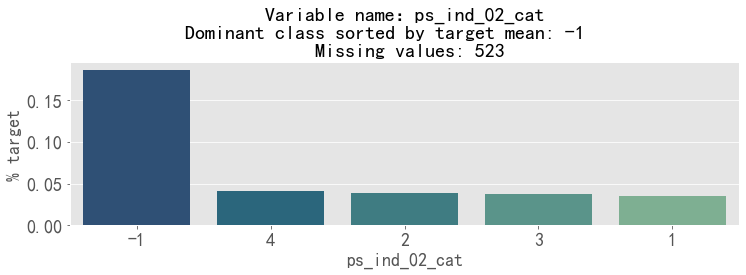

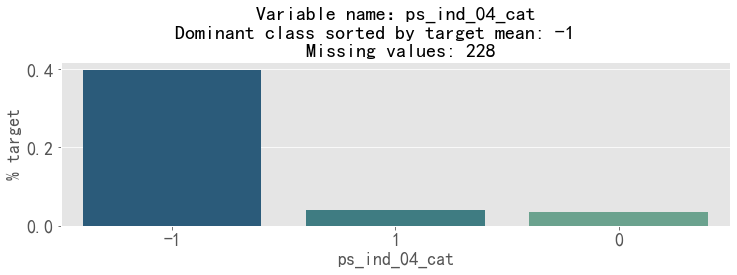

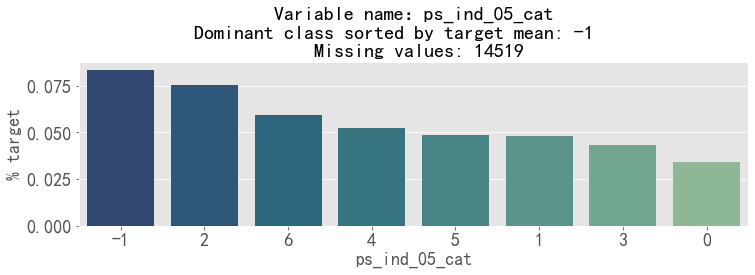

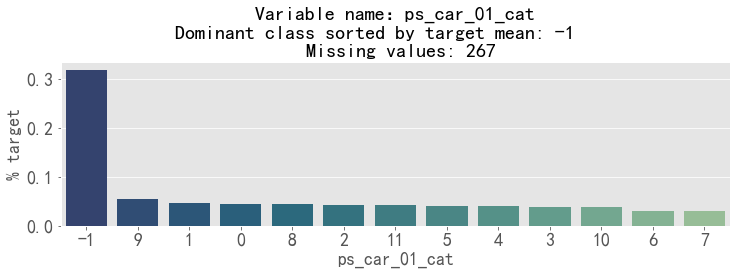

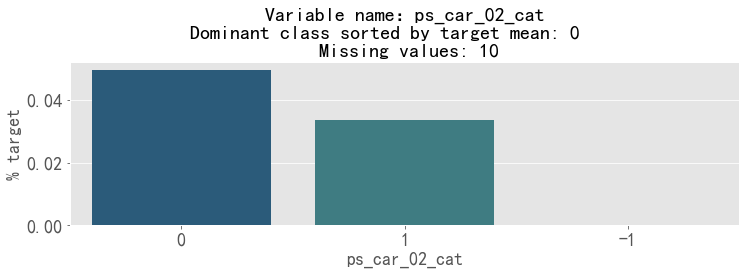

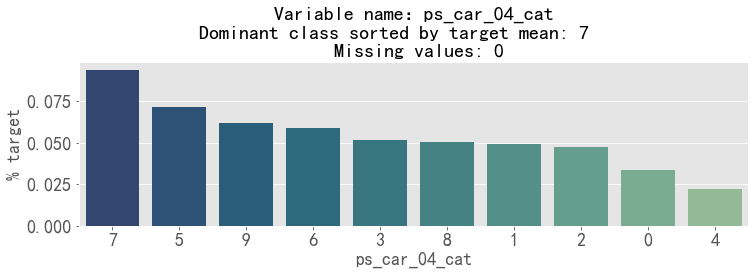

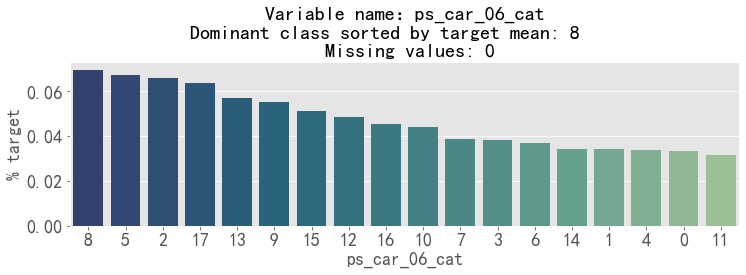

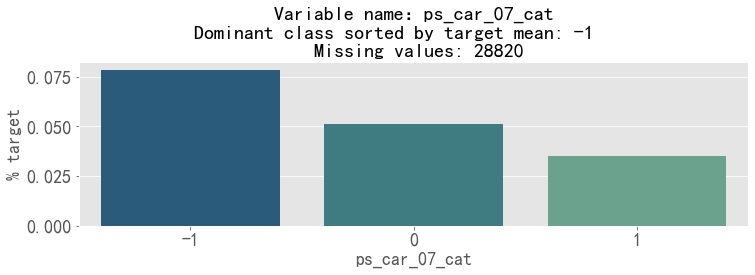

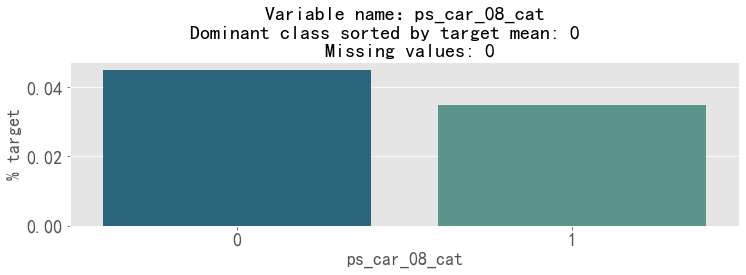

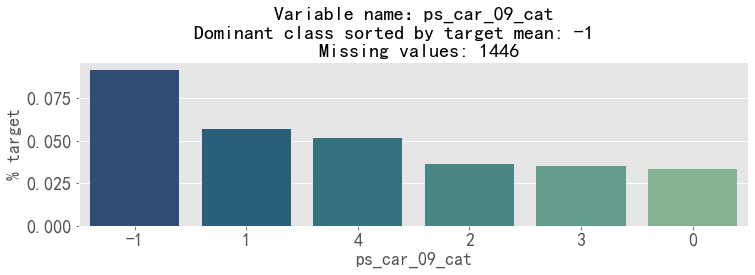

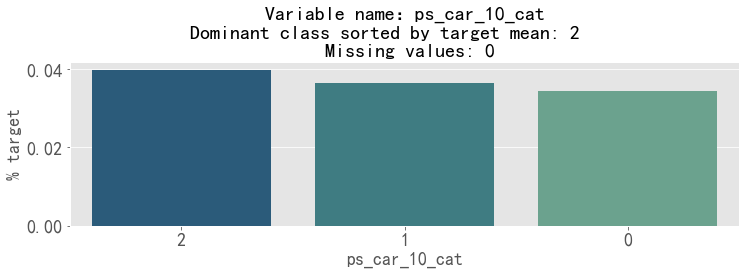

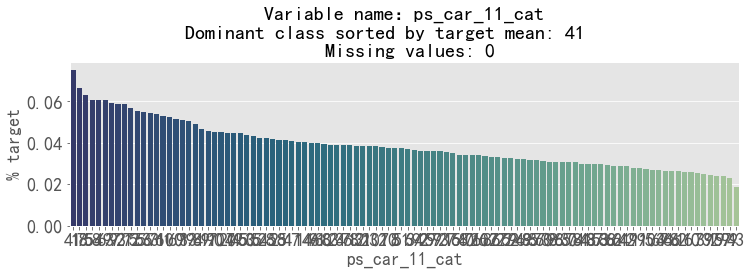

In [9]:
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(12,3))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # 柱形图，根据target mean从大到小排列。
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette = 'crest_r')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.title(f"Variable name：{col}\n Dominant class sorted by target mean: {cat_perc[col].iloc[0]} \
    \n Missing values: {metadata.loc[col]['missing']}", fontsize = 20)
    plt.show();

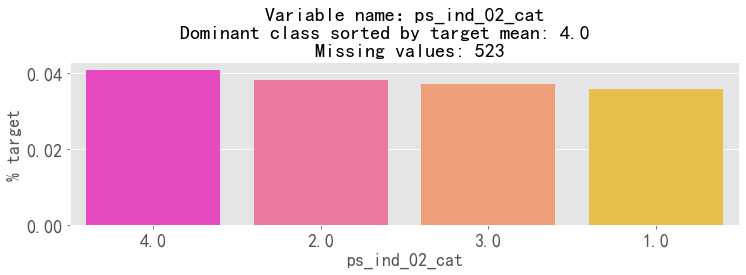

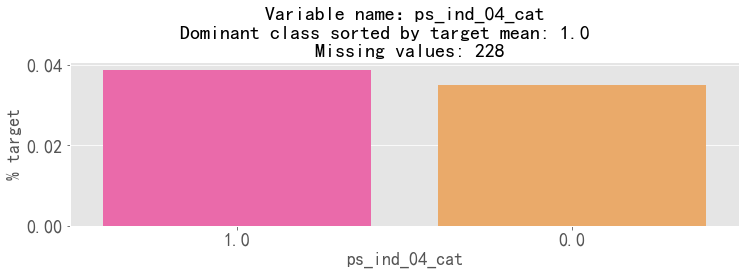

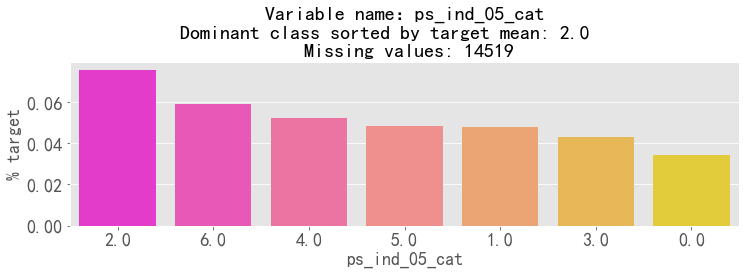

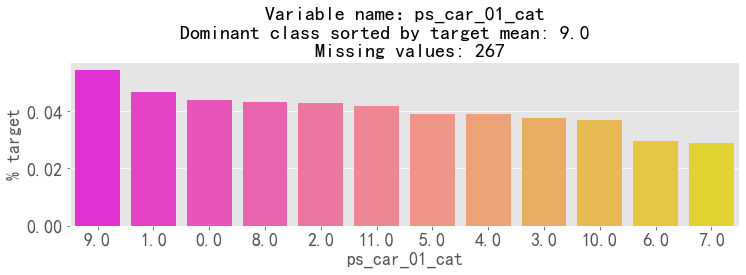

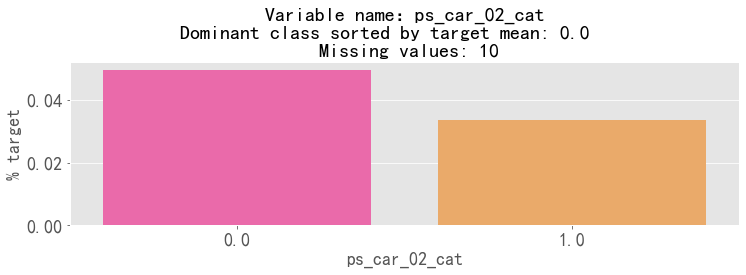

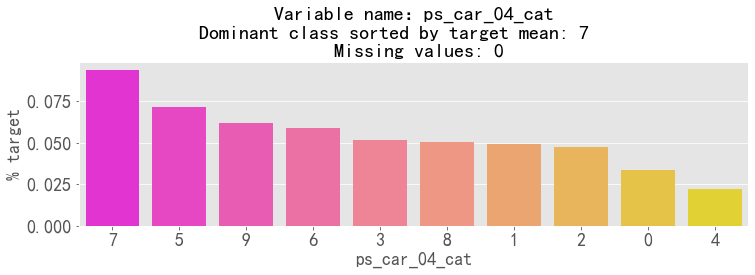

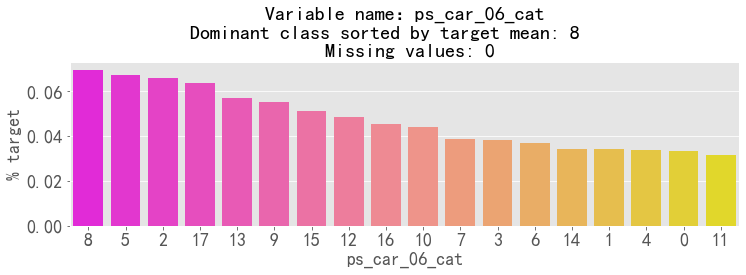

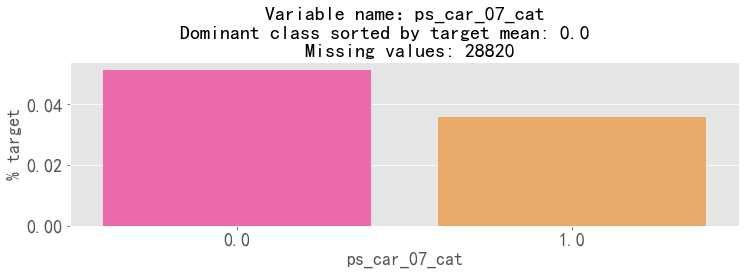

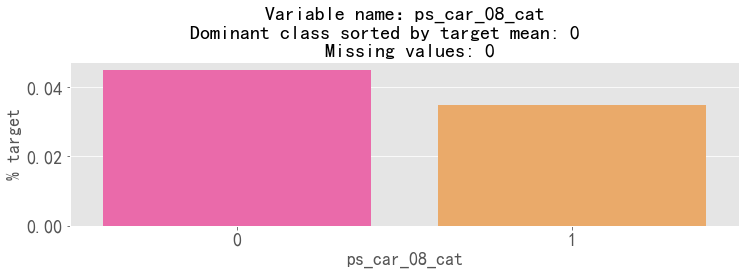

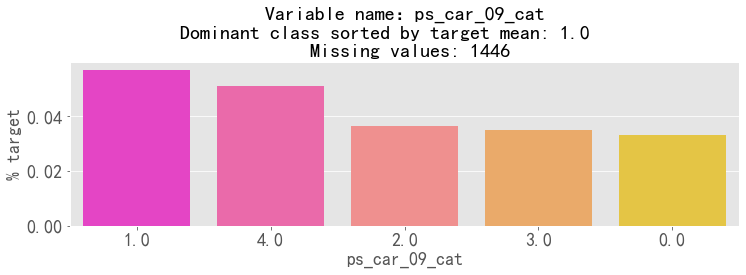

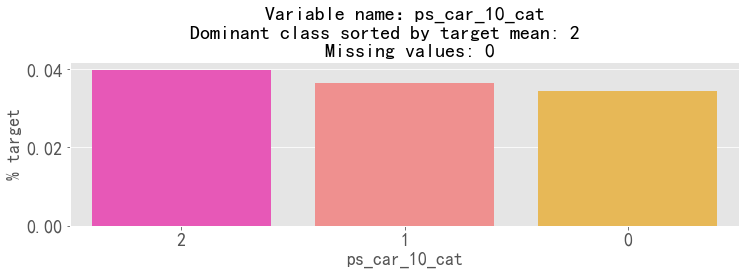

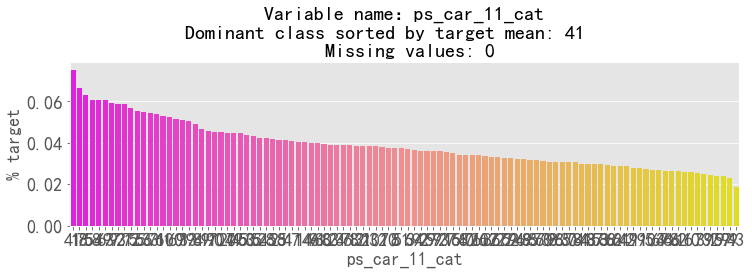

In [10]:
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(12,3))
    # Calculate the percentage of target=1 per category value
    cat_perc = train_imp[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # 柱形图，根据target mean从大到小排列。
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette = 'spring')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.title(f"Variable name：{col}\n Dominant class sorted by target mean: {cat_perc[col].iloc[0]} \
    \n Missing values: {metadata.loc[col]['missing']}", fontsize = 20)
    plt.show();

<div class="alert alert-block alert-success"><b>Step 1</b>: 
    
1. 这两段代码的结果有什么区别？
2. 我们应该如何处理？对离散型变量作出什么改变？【提示：inverse_transform】
    
</div>

solution：

1. 区别在于，上边的图用的是缺失值没填充时的数据，下边的是填充好的。

2. 这个图表示的是各个类别关于target=1，也就是是否索赔的占比，比如ps_car_07_cat，在第一串代码中得到的图中，当其等于-1时，对应的target=1的占比反而是最高的，超过25%，其他变量也都是类似情况，除了最后两个，因为缺失值的数量太少了。

2. 我们应该用inverse_transform，对之前impute的离散变量逆转换，保留-1这一类，作为我们的研究类别，并且更新我们的metadata，最后的两个缺失值仅有几个的数据，我们就继续用众数填充。


In [11]:
reverse_trans_cols = [
 'ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
]

In [12]:
train_imp[reverse_trans_cols] = train[reverse_trans_cols]

不过请大家注意这一列：ps_car_11_cat

这一列是nominal的，离散型变量，并且dominant的一类：104（虽然我不懂什么意思），占据整个类别的15%左右，所以我不能认为这一类完全压过了其他类，从而可以忽视其他类别的研究，而且这一列有104个唯一值数量，并且不存在顺序关系。

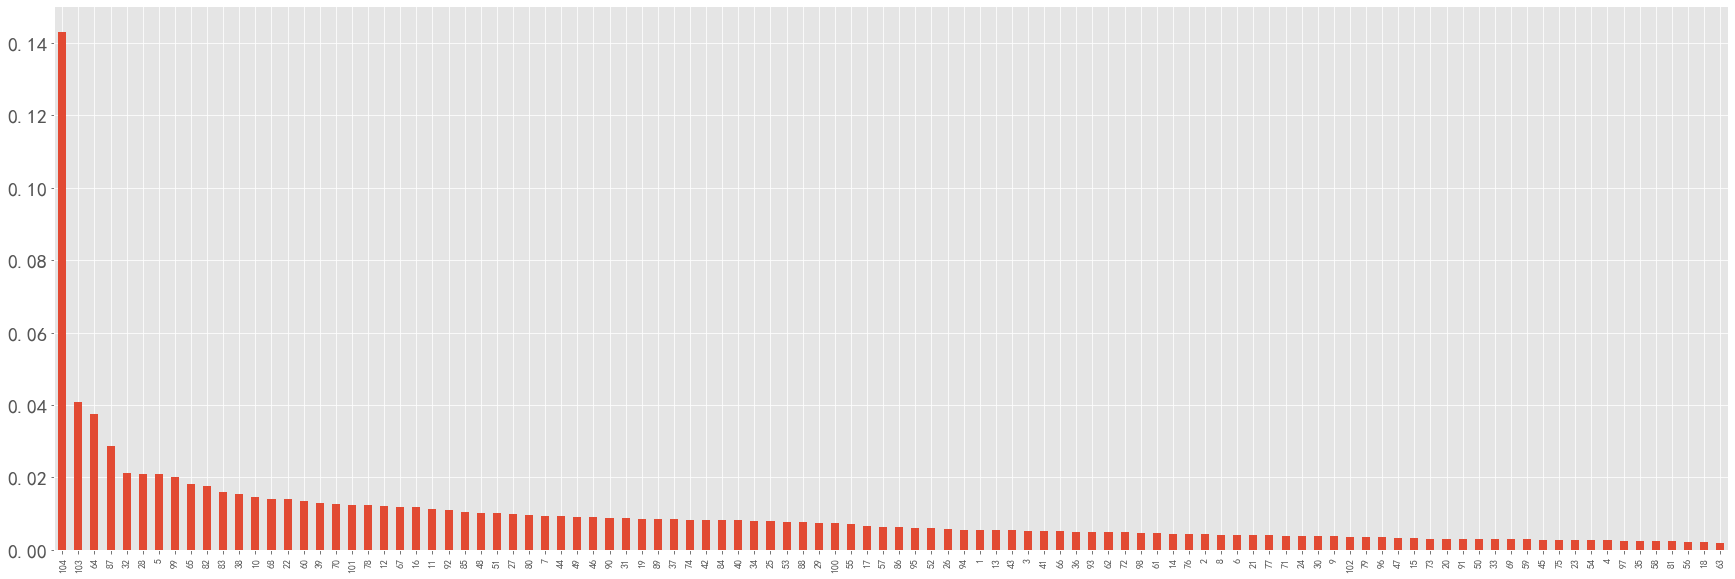

In [13]:
(train_imp.ps_car_11_cat.value_counts()/train_imp.shape[0]).plot(kind='bar',figsize = [30,10])
plt.tick_params(axis='y', which='major', labelsize=20)

### Binary

In [14]:
bin_cols = metadata[(metadata.level == 'binary') & (metadata.keep)].index

In [15]:
zero_list = []
one_list = []
for col in bin_cols:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [16]:
trace1 = go.Bar(
    x=bin_cols,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_cols,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables including TARGET'
)

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='stacked-bar')

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

### Ordinal

In [17]:
ord_cols = metadata[(metadata.level == 'ordinal') & (metadata.keep)].index

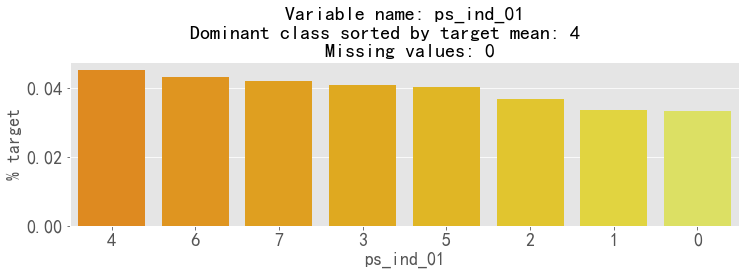

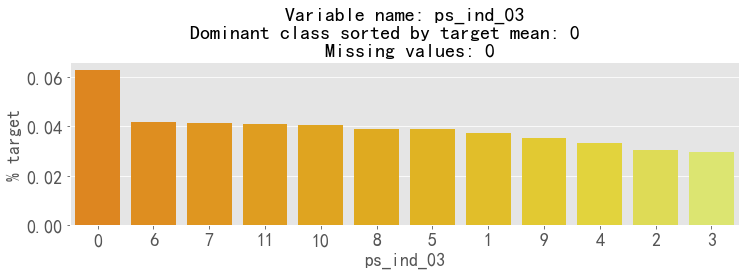

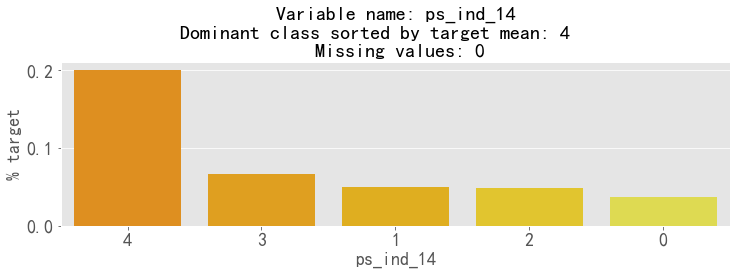

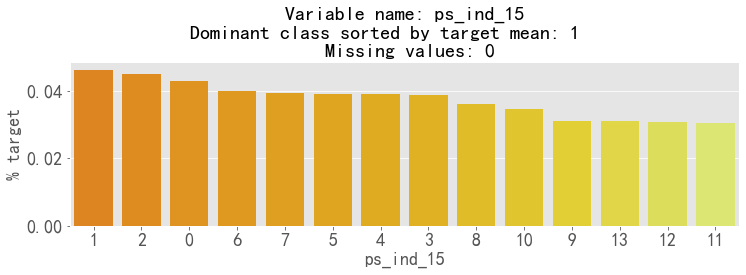

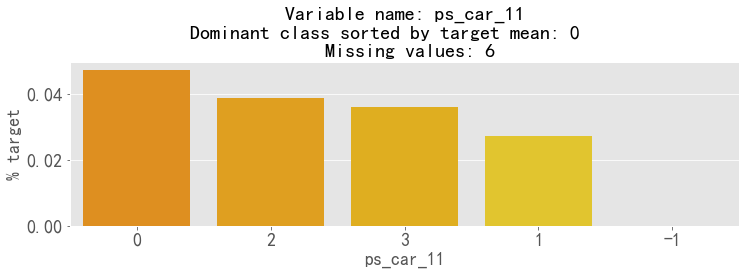

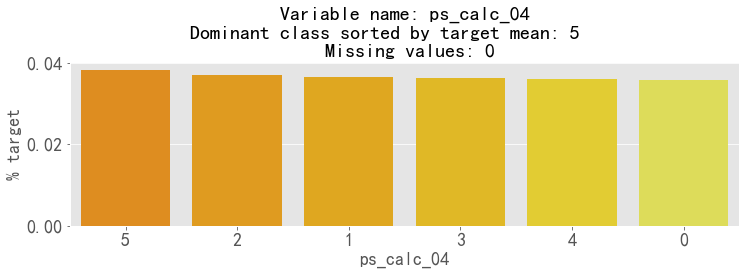

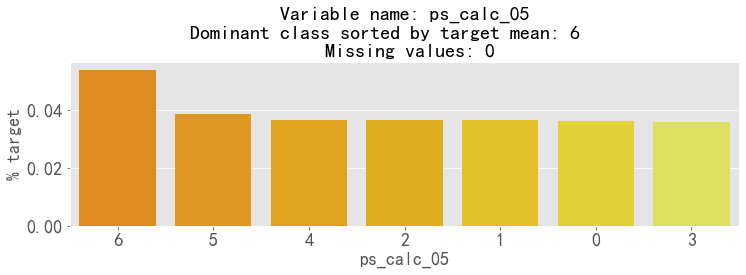

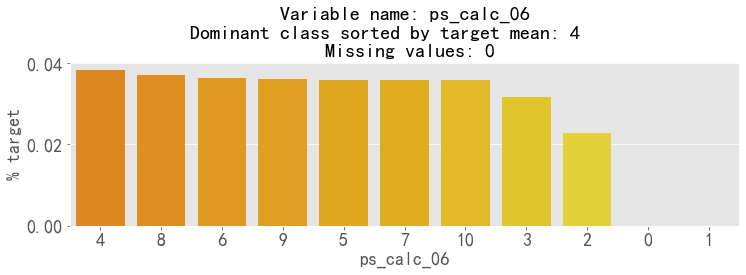

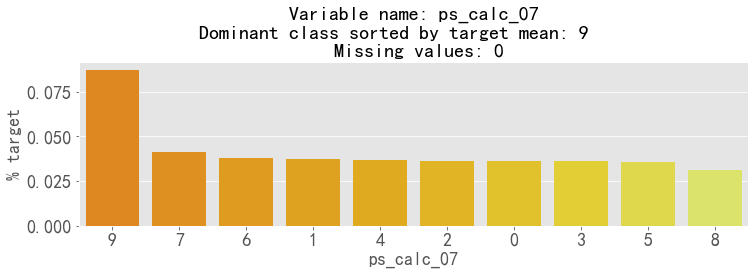

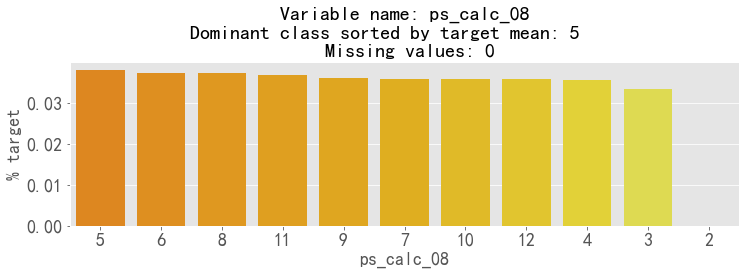

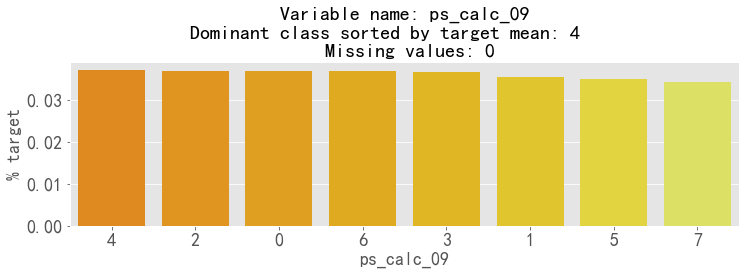

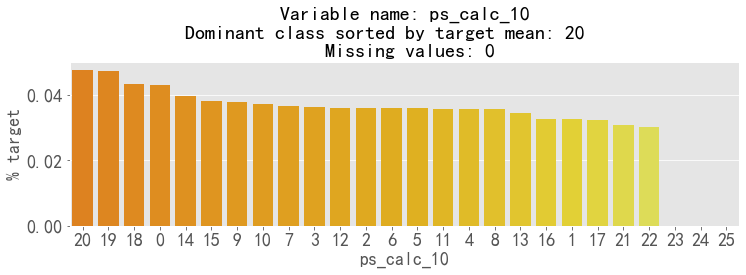

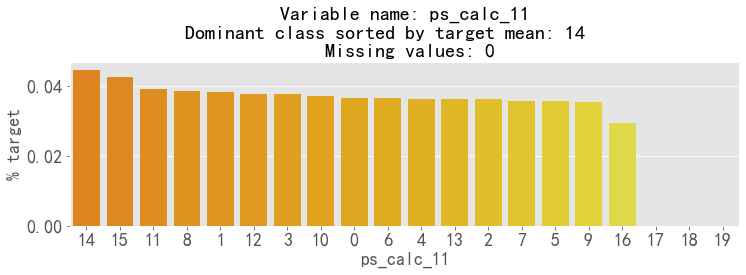

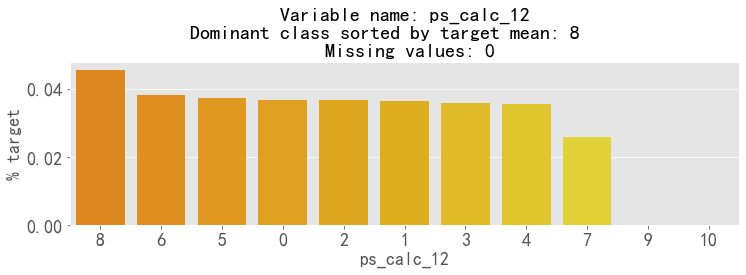

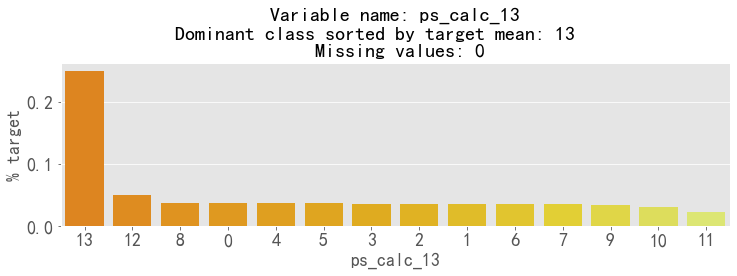

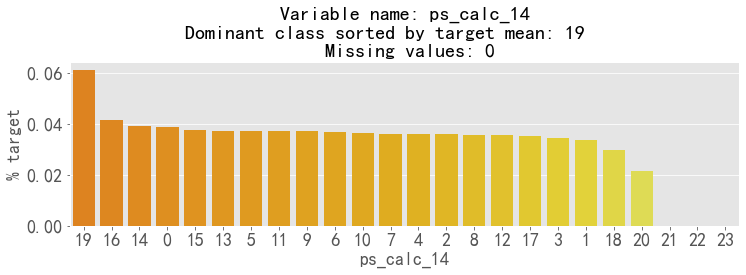

In [18]:
for col in ord_cols:
    fig, ax = plt.subplots(figsize=(12,3))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # 柱形图，根据target mean从大到小排列。
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette = 'Wistia_r')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.title(f"Variable name: {col}\n Dominant class sorted by target mean: {cat_perc[col].iloc[0]} \
    \n Missing values: {metadata.loc[col]['missing']}", fontsize = 20)
    plt.show();

## 连续变量分析

下面我们来看看连续型变量！

### 相关性分析

In [19]:
conti_cols = metadata[(metadata.level.isin(['ratio','interval'])) & (metadata.keep)].index

In [20]:
conti_cols

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='colname')

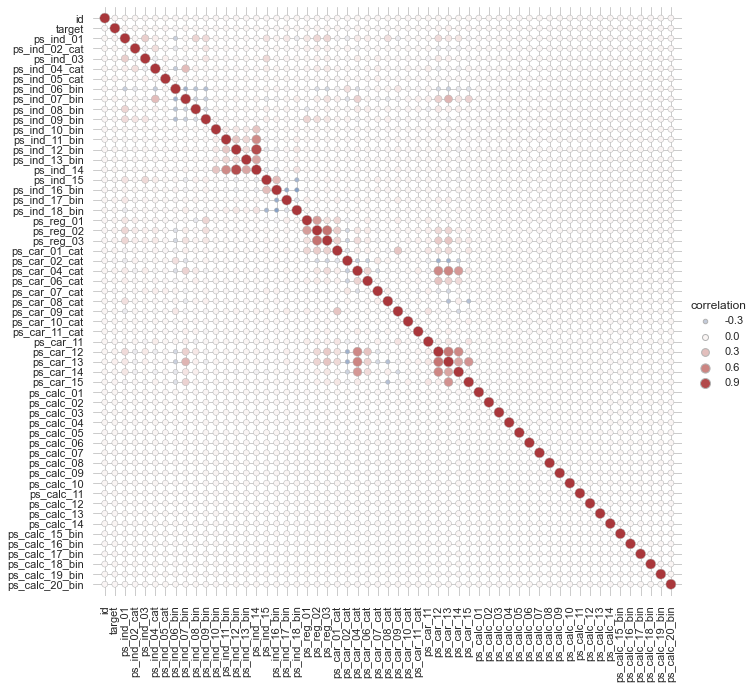

In [21]:
sns.set_theme(style="whitegrid")
corr_mat = train_imp.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(20, 100), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

<AxesSubplot:>

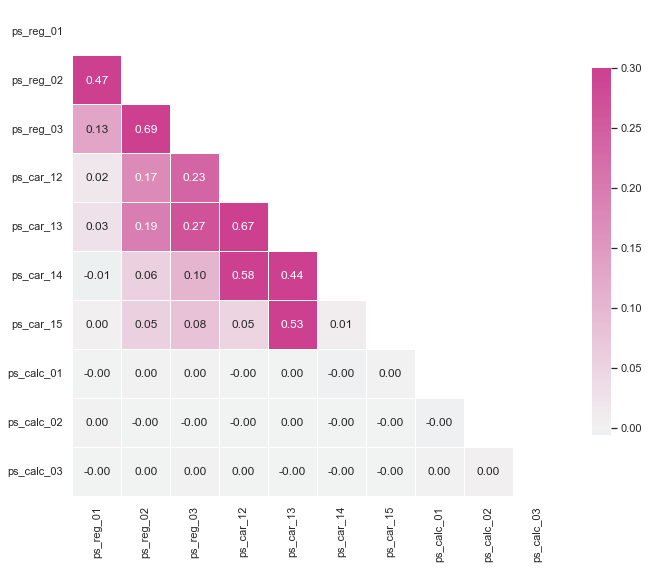

In [22]:
# Generate a mask for the upper triangle

corr_mat = train_imp[conti_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, -20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75},annot=True,fmt='.2f')

There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 (0.69)
- ps_car_12 and ps_car_13 (0.67)
- ps_car_12 and ps_car_14 (0.58)
- ps_car_13 and ps_car_15 (0.53)
- ps_reg_01 and ps_reg_02 (0.47)

### 回归分析

我们来继续探索变量间的线性关系。

In [23]:
trn_sample = train_imp.sample(2000)

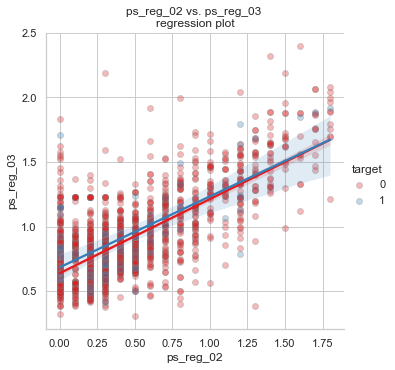

In [24]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=trn_sample, hue='target', 
           palette='Set1', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_reg_02 vs. ps_reg_03 \nregression plot')

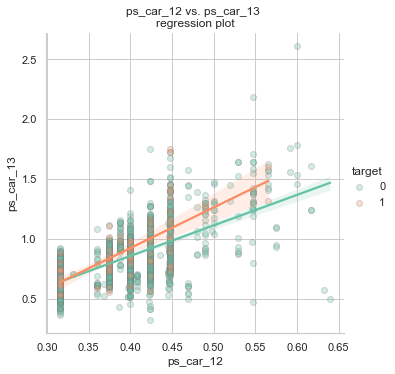

In [25]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=trn_sample, hue='target', 
           palette='Set2', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_car_12 vs. ps_car_13 \nregression plot')

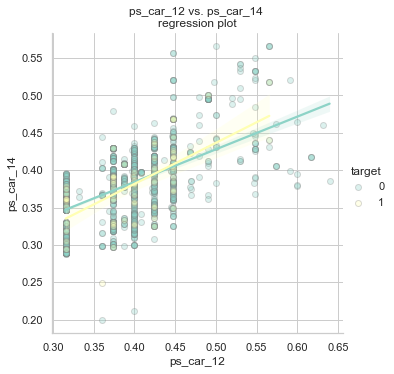

In [26]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=trn_sample, hue='target', 
           palette='Set3', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_car_12 vs. ps_car_14 \nregression plot')

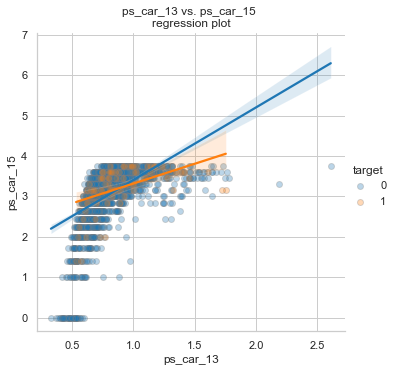

In [27]:
sns.lmplot(x='ps_car_13', y='ps_car_15', data=trn_sample, hue='target', 
           palette='tab10', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_car_13 vs. ps_car_15 \nregression plot')

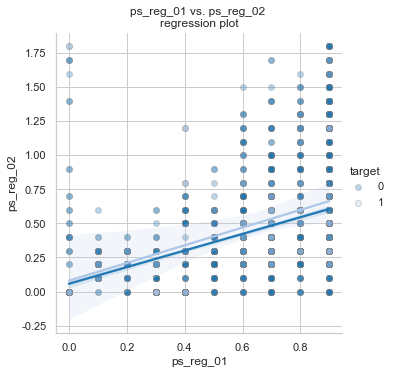

In [28]:
sns.lmplot(x='ps_reg_01', y='ps_reg_02', data=trn_sample, hue='target', 
           palette='tab20', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_reg_01 vs. ps_reg_02 \nregression plot')

## 特征重要度分析

In [29]:
from xgboost import XGBClassifier
from xgboost import plot_importance
plt.figure(figsize = [100,20])

X = train_imp.drop(['id', 'target'], axis=1)
y = train_imp.target

model = XGBClassifier()

model.fit(X, y)
# plot feature importance

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<Figure size 7200x1440 with 0 Axes>

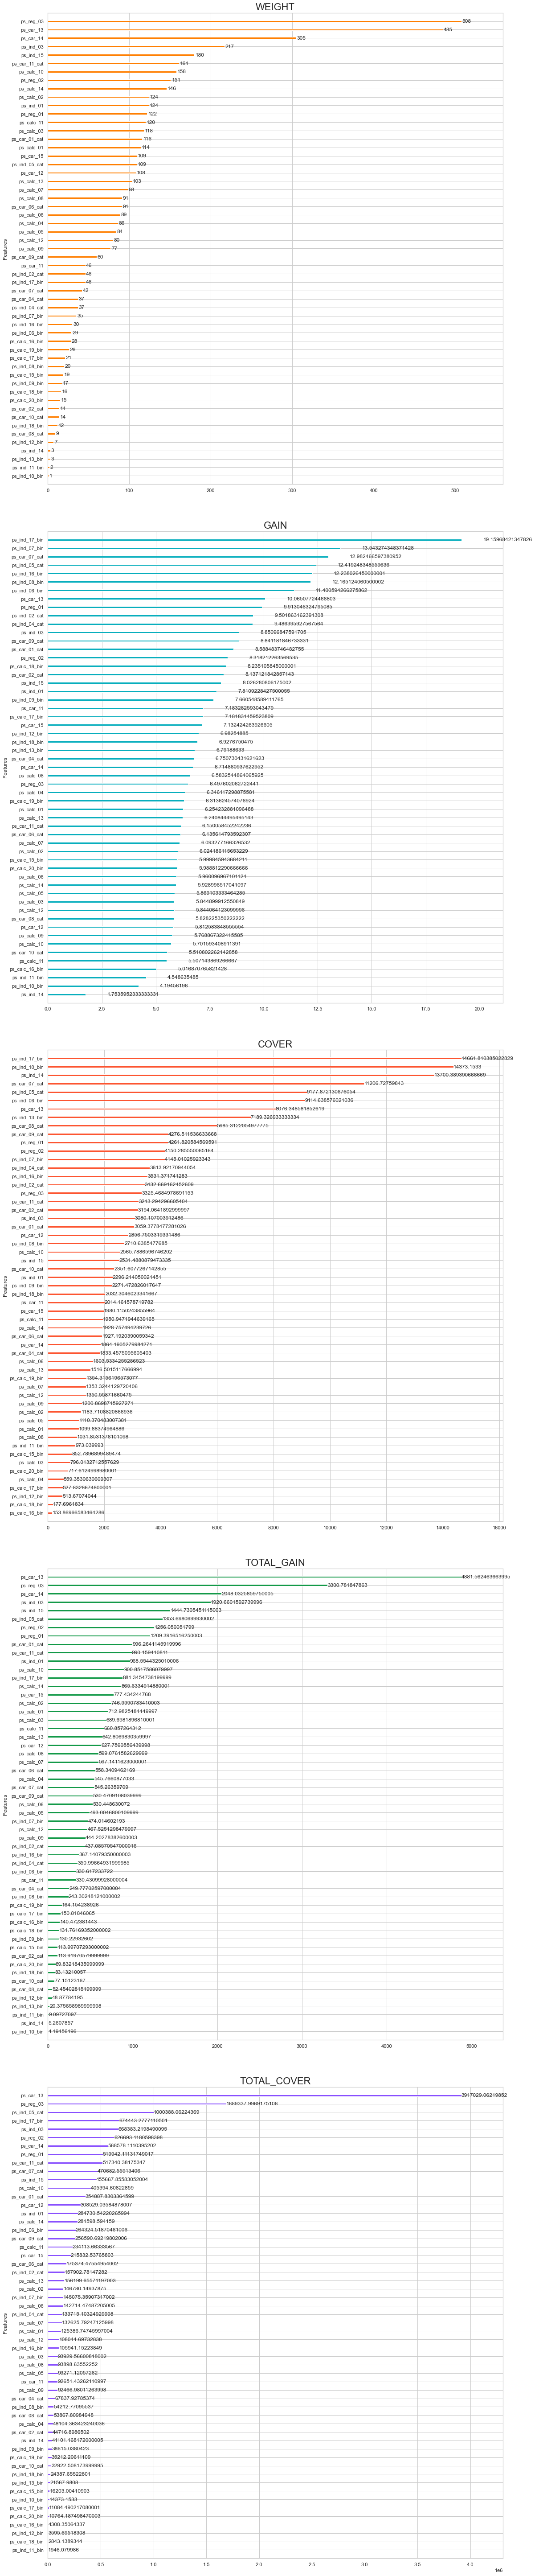

In [30]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model,importance_type=ty, color = color)

    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")

plt.show()

- 【gain】增益意味着相应特征对模型的相对贡献，通过获取模型中每棵树的每个特征的贡献来计算。与另一个特征相比，该指标的值越高意味着它对于生成预测更重要。
- 【Coverage】是指与该特征相关的观察的相对数量。例如，如果您有 100 个观测值，4 个特征和 3 棵树，假设在 tree1、tree2 和 tree3 中分别使用 feature1 来决定 10、5 和 2 个观测值的叶子节点；那么该指标将将此特征的覆盖率计为 10+5+2 = 17 个观察值。这将针对所有 4 个功能进行计算，并且覆盖率将 17 表示为所有功能的覆盖率指标的百分比。
- 【weights】是表示特定特征在模型树中出现的相对次数的百分比。在上面的例子中，如果feature1出现2次分裂，则tree1、tree2和tree3各有1次分裂和3次分裂；那么特征 1 的权重将为 2+1+3 = 6。特征 1 的频率计算为其权重占所有特征权重的百​​分比。


> 增益是解释每个特征的相对重要性最相关的属性。
“增益”是特征为其所在分支带来的准确性提高。这个想法是，在将特征 X 上的新拆分添加到分支之前，有一些错误分类的元素，在此特征上添加拆分后，有两个新分支，每个分支都更准确（一个分支说如果你的观察是在这个分支上，那么它应该被归类为 1，而另一个分支则完全相反）。
“覆盖率”衡量一个特征所涉及的观察的相对数量。

## 互信息分析

Mutual information is another useful tool to measure the reduction of the uncertainty of the system between the target variable and the corresponding feature.

For classification problems, we can conveniently call Sklearn's `mutual_info_classif` method which measures the dependency between two random variables and ranges from zero. This therefore will help give us an idea of how much information from the target may be contained within the features.

```
X: array_like or sparse matrix, shape (n_samples, n_features)
   Feature matrix.
特征矩阵。

y：array_like, shape (n_samples,)
   Target vector.
标签向量。

discrete_features：{‘auto’,bool, array_like}, default=‘auto’
如果为'auto'，则将其分配给False（表⽰稠密）X，将其分配给True（表⽰稀疏）X。
如果是bool，则确定是考虑所有特征是离散特征还是连续特征。
如果是数组，则它应该是具有形状（n_features，）的布尔蒙版或具有离散特征索引的数组。

n_neighbors：int, default=3
⽤于连续变量的MI估计的邻居数；
较⾼的值会减少估计的⽅差，但可能会带来偏差。

copy：bool, default=True
是否复制给定的数据。如果设置为False，则初始数据将被覆盖。

random_state：int, RandomState instance orNone, optional, default None
确定随机数⽣成，以将⼩噪声添加到连续变量中以删除重复值。
在多个函数调⽤之间传递int以获得可重复的结果。

Returns
-------
mi：ndarray, shape (n_features,)
每个功能和⽬标之间的估计相互信息。
```

In [31]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/U9h1xkNELvY")

In [32]:
%%time
mf = mutual_info_classif(train_imp.drop(['id','target'],axis=1).values,
                         train_imp.target.values,
                         n_neighbors=30, random_state=2022)
print(mf)

[1.13688315e-03 4.22158074e-03 1.35599884e-03 1.68686989e-03
 8.57707895e-04 1.86228440e-03 1.12560973e-03 2.77409873e-04
 4.06129362e-04 0.00000000e+00 1.14051723e-05 7.66921627e-05
 0.00000000e+00 1.12701163e-05 1.24501323e-03 4.49947066e-03
 5.92141362e-04 2.36087711e-04 1.34802166e-03 9.28019750e-04
 5.18843733e-04 2.80119096e-03 6.64504597e-03 7.93398089e-04
 1.53250383e-03 8.38246069e-03 6.60925418e-03 5.06933218e-03
 9.00388241e-03 1.44670132e-03 3.91695305e-03 1.48370371e-03
 1.84021357e-03 9.77655896e-04 1.26728143e-03 3.82313257e-04
 3.90869701e-04 2.84671759e-04 1.96475285e-03 2.05495176e-03
 1.96014168e-03 1.60294717e-03 1.88351358e-03 1.79755088e-03
 9.60430682e-04 9.10600275e-04 1.74713733e-03 1.38065000e-03
 8.71062322e-04 1.20886246e-04 3.56145372e-03 2.70045648e-03
 7.07345176e-04 1.10377568e-03 9.43819366e-05]
Wall time: 6min 54s


In [33]:
threshold = 10
high_score_features = []
high_score = []
for score, f_name in sorted(zip(mf, train_imp.drop(['id','target'],axis=1).columns), reverse=True)[:threshold]:
    print(f_name, score)
    high_score_features.append(f_name)
    high_score.append(score)

ps_car_10_cat 0.009003882411455333
ps_car_07_cat 0.008382460694422278
ps_car_02_cat 0.006645045972727637
ps_car_08_cat 0.006609254183864266
ps_car_09_cat 0.005069332176625085
ps_ind_16_bin 0.0044994706649483796
ps_ind_02_cat 0.00422158074290202
ps_car_11 0.003916953051236849
ps_calc_16_bin 0.00356145371805372
ps_car_01_cat 0.0028011909644849453


<AxesSubplot:>

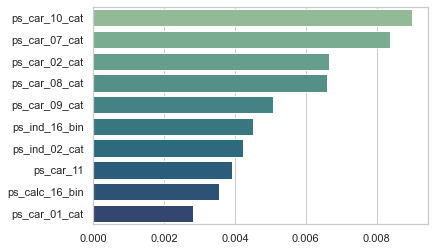

In [34]:
sns.barplot(y = high_score_features, x = high_score, palette = 'crest')

下一章节，我们将开展特征工程的内容，包括：

- 特征编码
- 数据分箱
- 数据转换
- 特征筛选
- 特征组合